In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [12]:
toxic_data=pd.read_csv('C:\\Users\\honey\\Desktop\\Projects\\train.csv')
print(toxic_data.shape)
toxic_data.head(10)

(159571, 2)


,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,Non-Toxic
1,D'aww! He matches this background colour I'm s...,Non-Toxic
2,"Hey man, I'm really not trying to edit war. It...",Non-Toxic
3,"""\nMore\nI can't make any real suggestions on ...",Non-Toxic
4,"You, sir, are my hero. Any chance you remember...",Non-Toxic
5,"""\n\nCongratulations from me as well, use the ...",Non-Toxic
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,Toxic
7,Your vandalism to the Matt Shirvington article...,Non-Toxic
8,Sorry if the word 'nonsense' was offensive to ...,Non-Toxic
9,alignment on this subject and which are contra...,Non-Toxic


In [13]:
#Summary of the dataset
toxic_data.describe()

,comment_text,toxic
count,159571,159571
unique,159571,2
top,"""\n Last day to nom Île Frégate.♦ """,Non-Toxic
freq,1,144277


In [14]:
#toxic count
toxic_data['toxic'].value_counts()

Non-Toxic    144277
Toxic         15294
Name: toxic, dtype: int64

In [15]:
#split the dataset  
#train dataset
train_text=toxic_data.comment_text[:40000]
train_toxic=toxic_data.toxic[:40000]
#test dataset
test_text=toxic_data.comment_text[40000:]
test_toxic=toxic_data.toxic[40000:]
print(train_text.shape,train_toxic.shape)
print(test_text.shape,test_toxic.shape)


(40000,) (40000,)
(119571,) (119571,)


In [16]:
#Tokenization of text
from nltk.tokenize import word_tokenize
tokenizer=word_tokenize('text')

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{'its', 'whom', 'didn', 'wouldn', 'his', 'theirs', 'who', 'has', 're', 'any', 'd', 'her', 'again', 'having', 'an', 'by', 'than', "should've", 'until', 'weren', 'yourself', 'this', 'now', 'ain', "wouldn't", "weren't", 'been', 'doing', 'won', "you're", 'such', 'is', 'shan', 'off', 'haven', 'other', "wasn't", 'and', "she's", 'own', 'don', 'on', 'should', 'why', 'all', 'further', 'ourselves', 'up', "don't", 'she', 'hasn', 's', 'just', 'i', 'because', 'herself', 'where', 'too', 'yours', 'as', 'very', 'for', "you've", 'not', 'mustn', 'wasn', 'then', 'your', 'if', 'no', 'once', 'when', 'itself', 'down', 'under', 'those', 'how', 'aren', 'a', 'after', 'here', 't', "shouldn't", 'at', 'shouldn', 'am', 'more', "haven't", 'did', 'from', 'be', 'hadn', 'few', "you'd", 'couldn', 'does', 'their', 'm', 'my', 'what', 'they', 'in', 'he', 'against', 'nor', 'below', 'o', 'have', 'him', 've', 'them', "won't", 'or', "mustn't", 'ma', 'out', "aren't", 'each', 'we', 'above', 'being', 'had', 'will', "hadn't", 'it

In [20]:
#Normalized train comments
norm_train_comments=toxic_data.comment_text[:40000]
norm_train_comments[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.2Non-Toxic5.38.27"

<function matplotlib.pyplot.show(*args, **kw)>

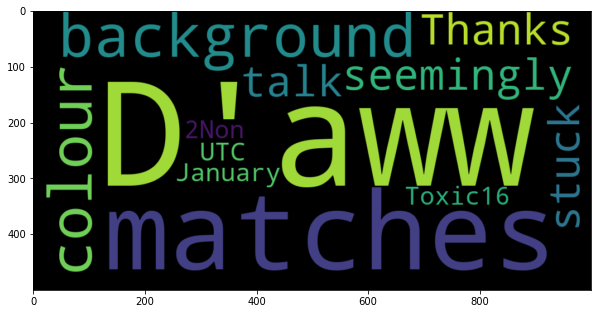

In [21]:
#word cloud for toxic comment words
plt.figure(figsize=(10,10))
positive_text=norm_train_comments[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

In [22]:
#Normalized test comments
norm_test_comments=toxic_data.comment_text[40000:]
norm_test_comments[45000]

"Hi , thanks, I'll be following up with that this week or next. Cheers,"

<function matplotlib.pyplot.show(*args, **kw)>

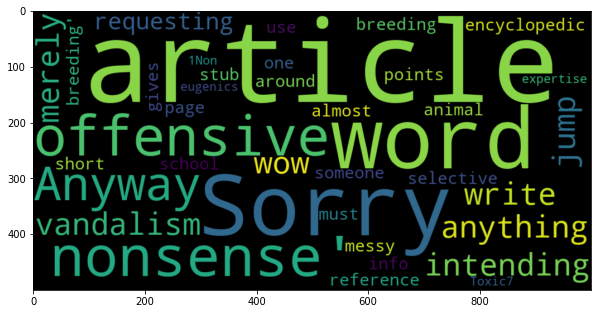

In [23]:
#word cloud for Non-toxic comment words
plt.figure(figsize=(10,10))
negative_text=norm_train_comments[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [25]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_comments=cv.fit_transform(norm_train_comments)
#transformed test reviews
cv_test_comments=cv.transform(norm_test_comments)

print('BOW_cv_train:',cv_train_comments.shape)
print('BOW_cv_test:',cv_test_comments.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 2183479)
BOW_cv_test: (119571, 2183479)


In [27]:
#Tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_comments=tv.fit_transform(norm_train_comments)
#transformed test reviews
tv_test_comments=tv.transform(norm_test_comments)
print('Tfidf_train:',tv_train_comments.shape)
print('Tfidf_test:',tv_test_comments.shape)

Tfidf_train: (40000, 2183479)
Tfidf_test: (119571, 2183479)


In [31]:
#labeling the sentient data
from sklearn import preprocessing
lb=preprocessing.LabelBinarizer()
#transformed sentiment data
toxic_type_data=lb.fit_transform(toxic_data['toxic'])
print(toxic_type_data.shape)

(159571, 1)


In [33]:
#Spliting the sentiment data
train_toxic=toxic_type_data[:40000]
test_toxic=toxic_type_data[40000:]
print(train_toxic)
print(test_toxic)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [34]:
# Modelling the data using Logestic Regression MOdel
#training the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_comments,train_toxic)
print(lr_bow)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_comments,train_toxic)
print(lr_tfidf)

C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [35]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_comments)
print(lr_bow_predict)

##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_comments)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [37]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score
lr_bow_score=accuracy_score(test_toxic,lr_bow_predict)*100
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_toxic,lr_tfidf_predict)*100
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 90.7067767267983
lr_tfidf_score : 90.50773180787984


In [42]:
#Classification report for bag of words 
from sklearn.metrics import classification_report
lr_bow_report=classification_report(test_toxic,lr_bow_predict,target_names=['Toxic','Non-toxic'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_toxic,lr_tfidf_predict,target_names=['Toxic','Non-toxic'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

       Toxic       0.91      1.00      0.95    108221
   Non-toxic       0.79      0.03      0.06     11350

    accuracy                           0.91    119571
   macro avg       0.85      0.51      0.50    119571
weighted avg       0.90      0.91      0.87    119571

              precision    recall  f1-score   support

       Toxic       0.91      1.00      0.95    108221
   Non-toxic       0.00      0.00      0.00     11350

    accuracy                           0.91    119571
   macro avg       0.45      0.50      0.48    119571
weighted avg       0.82      0.91      0.86    119571



In [43]:
#confusion matrix for bag of words
from sklearn.metrics import confusion_matrix
cm_bow=confusion_matrix(test_toxic,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_toxic,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[   324  11026]
 [    86 108135]]
[[     0  11350]
 [     0 108221]]
